In [110]:
import numpy as np
import pandas as pd
import scipy.stats #статистика
import matplotlib.pyplot as plt
import csv
#линейная регрессия
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
#векторный анализ
from sklearn.svm import SVC
#svm - support vector regression
#SVC - support vector classification

In [111]:
data=pd.read_csv('C:/Users/Лина/Downloads/Обучение/Машинное обучение/Лекция_2/adult.csv', delimiter=',')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


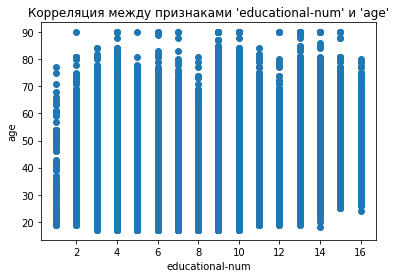

<Figure size 864x720 with 0 Axes>

In [142]:
import matplotlib.pyplot as plt

x_values = data['educational-num']
y_values = data['age']

plt.scatter(x_values, y_values)

plt.xlabel('educational-num')
plt.ylabel('age')
plt.title("Корреляция между признаками 'educational-num' и 'age'")
plt.figure(figsize=(12, 10))

plt.show()



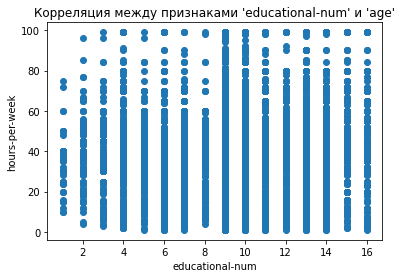

<Figure size 864x720 with 0 Axes>

In [143]:
import matplotlib.pyplot as plt

x_values = data['educational-num']
y_values = data['hours-per-week']

plt.scatter(x_values, y_values)

plt.xlabel('educational-num')
plt.ylabel('hours-per-week')
plt.title("Корреляция между признаками 'educational-num' и 'age'")
plt.figure(figsize=(12, 10))

plt.show()



Выберем первоначальный набор признаков для обучения и целевой столбец

In [113]:
selectedColumns = data[['educational-num', 'occupation', 'hours-per-week', 'income']]
selectedColumns['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

Исключим записи, где в значении occupation стоит знак '?', т.к. это значение для обучения равносильно 'non'

In [114]:
selectedColumns = selectedColumns[~(selectedColumns['occupation']=='?')]
selectedColumns['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [115]:
selectedColumns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46033 entries, 0 to 48841
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   educational-num  46033 non-null  int64 
 1   occupation       46033 non-null  object
 2   hours-per-week   46033 non-null  int64 
 3   income           46033 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.8+ MB


Преобразуем столбец 'occupation' в числовой формат. Создадим тренировочное множество X и исключаем из него целевой столбец 'income'.

In [116]:
X = pd.get_dummies(selectedColumns, columns=['occupation'])
del X['income']
X.head()

,educational-num,hours-per-week,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,7,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,9,50,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,12,40,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,10,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,6,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Создадим целевое множество и преобразуем целевое поле 'income' в набор 0 и 1.

In [126]:
le.fit(selectedColumns['income'])
le.classes_
y = pd.Series(data=le.transform(selectedColumns['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

Делим выборку на тренировочную и тестовую.

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X_train) + len(X_test) == len(X)

True

In [ ]:
Создаем модель машинного обучения логической регрессии. Запускаем обучение.

In [119]:
model = make_pipeline(
StandardScaler(),
LogisticRegression(max_iter=1000))

In [120]:
model.fit(X_train,y_train)
predictions = model.predict(X_test)
predictions[:100]
model.predict_proba(X_test)

array([[0.55579147, 0.44420853],
       [0.62110932, 0.37889068],
       [0.50739224, 0.49260776],
       ...,
       [0.86657218, 0.13342782],
       [0.99331788, 0.00668212],
       [0.89758698, 0.10241302]])

Посчитаем точность прогноза модели на тренировочной и тестовой выборках.

In [121]:
model.score(X_train,y_train)

0.7813501330581655

In [122]:
model.score(X_test,y_test)

0.7810361681329423

Создаем модель машинного обучения векторного анализа. Запускаем обучение.

In [123]:
clf = make_pipeline(StandardScaler(),SVC())
clf.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

Посчитаем точность прогноза модели на тренировочной и тестовой выборках.

In [124]:
clf.score(X_train,y_train)

0.7846630098300114

In [125]:
clf.score(X_test,y_test)

0.7822309112631693

Выводы.
Мы увидели хорошее соответствие между результатами, полученными на тренировочной и тестовой выборках. Это говорит о том что данные были правильно подготовлены и разделены на test и train.
Также мы увидели малую разницу между результатами логической регрессии и векторного анализа, при том, что обучение с использованием векторного анализа заняло больше времени и оперативных ресурсов из чего можно сделать вывод о нецелесообразности использования данного метода в этой задаче.

Улучшить качество прогноза можно добавив большее количество атрибутов в обучение и перейдя к нелинейным алгоритмам машинного обучения. 